In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('rezultatai-or-a-lyga-or-2022_a-lyga-2022_captured-list_2023-03-23_66285056-2d13-4f5f-bdc1-46b9c246e61f.csv')

In [136]:
df.head()

,Home,Away,homeResult,awayResult,Winner
Date,,,,,
2022-11-23 19:00:00,4,0,2,3,Away
2022-11-23 19:00:00,7,1,2,3,Away
2022-11-23 19:00:00,6,5,2,2,Draw
2022-11-23 19:00:00,3,10,2,1,Home
2022-11-23 19:00:00,8,9,1,1,Draw


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  228 non-null    int64 
 1   Date      180 non-null    object
 2   Home      180 non-null    object
 3   Result    180 non-null    object
 4   Away      180 non-null    object
 5   Home1     180 non-null    object
 6   Away1     180 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.6+ KB


Position     0
Date        48
Home        48
Result      48
Away        48
Home1       48
Away1       48
dtype: int64

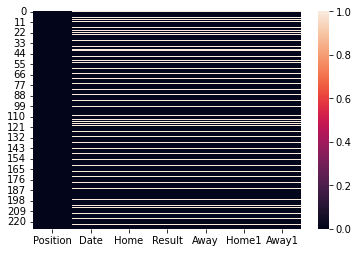

In [7]:
sns.heatmap(df.isnull())
df.isnull().sum()

In [44]:
df = df.drop(['Result'], axis=1)

In [12]:
df = df.dropna()

In [18]:
import pandas as pd

df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d, %H:%M")

In [21]:
df = df.set_index('Date')

In [42]:
score_strings = df['Result']
results = []
homeResult = []
awayResult = []

for score_string in score_strings:
    scores = score_string.split(' : ')
    home = int(scores[0])
    away = int(scores[1])
    homeResult.append(home)
    awayResult.append(away)

df['homeResult'] = homeResult
df['awayResult'] = awayResult

In [50]:
df['homeResult'][0]

2

In [107]:
encoder = {}
        
for i in range(0, df['Winner'].nunique()):
    encoder[df['Winner'].unique()[i]] = i
    
encoder['Jonava'] = 10

encoder

{'K. Žalgiris': 0,
 'Šiauliai': 1,
 'Draw': 2,
 'Panevėžys': 3,
 'Žalgiris': 4,
 'Riteriai': 5,
 'Hegelmann': 6,
 'Banga': 7,
 'Sūduva': 8,
 'Džiugas': 9,
 'Jonava': 10}

In [110]:
for i in range(0, df['Winner'].nunique()):
    df = df.replace(encoder)


In [120]:
df1 = df.drop(['Winner'], axis=1)

In [135]:
df1.head()

,Home,Away,homeResult,awayResult
Date,,,,
2022-11-23 19:00:00,4,0,2,3
2022-11-23 19:00:00,7,1,2,3
2022-11-23 19:00:00,6,5,2,2
2022-11-23 19:00:00,3,10,2,1
2022-11-23 19:00:00,8,9,1,1


In [125]:
X = df1.drop(['homeResult', 'awayResult'], axis=1)
y = df1[['homeResult', 'awayResult']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

1.0555555555555556


0.8981481481481481


0.962962962962963


0.9537037037037037


1.0185185185185186

 {'Random Forest': 0.8981481481481481, 'K-NNs': 0.9537037037037037, 'Log.Regression': 0.962962962962963, 'XGBoost': 1.0185185185185186, 'Decision Tree': 1.0555555555555556}


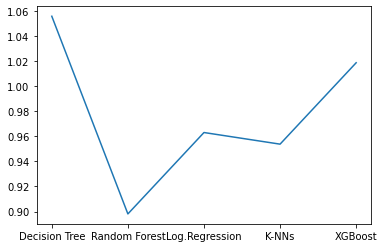

In [130]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
    
dtree = DecisionTreeRegressor()
rand = RandomForestRegressor()
svm_train = svm.LinearSVC()
lin = LinearRegression()
neig = KNeighborsRegressor()
xgb = XGBRegressor()
    
dtree.fit(X_train, y_train)
dtree_results = np.around(dtree.predict(X_test))
dtree_mae = mean_absolute_error(y_test, dtree_results)
#print('Decision Tree:\n' + classification_report(y_test, dtree_results))
print(dtree_mae)
print('\n')
    
rand.fit(X_train, y_train)
rand_results = np.around(rand.predict(X_test))
rand_mae = mean_absolute_error(y_test, rand_results)
#print('Random Forest:\n' + classification_report(y_test, rand_results))
print(rand_mae)
print('\n')
    
#svm_train.fit(X_train, y_train)
#svm_train_results = svm_train.predict(X_test)
#svm_mae = mean_absolute_error(y_test, svm_train_results)
#print('SVM:\n' + classification_report(y_test, svm_train_results))
#print(svm_mae)
#print('\n')
    
lin.fit(X_train, y_train)
lin_results = np.around(lin.predict(X_test))
lin_mae = mean_absolute_error(y_test, lin_results)
#print('Lin.Regression:\n' + classification_report(y_test, lin_results))
print(lin_mae)
print('\n')
    
neig.fit(X_train, y_train)
neig_results = np.around(neig.predict(X_test))
neig_mae = mean_absolute_error(y_test, neig_results)
#print('K-NNs:\n' + classification_report(y_test, neig_results))
print(neig_mae)
print('\n')
    
xgb.fit(X_train, y_train)
xgb_results = np.around(xgb.predict(X_test))
xgb_mae = mean_absolute_error(y_test, xgb_results)
#print('XGBoost:\n'+ classification_report(y_test, xgb_results))
print(xgb_mae)
    
    
models={'Decision Tree': dtree_mae,
           'Random Forest': rand_mae,
            #'SVM': svm_mae,
            'Log.Regression': lin_mae,
            'K-NNs': neig_mae,
            'XGBoost': xgb_mae
           }
    
sns.lineplot(data=models)

keys = sorted(models, key=models.get)
values = sorted(models.values())
best = dict(zip(keys, values))

print('\n',best)

In [144]:
est_winner = []

for i in range(len(rand_results)):
    if rand_results[i][0] > rand_results[i][1]:
        est_winner.append('Home')
    elif rand_results[i][0] < rand_results[i][1]:
        est_winner.append('Away')
    else:
        est_winner.append('Draw')
        
est_winner        

['Home',
 'Home',
 'Home',
 'Home',
 'Home',
 'Away',
 'Draw',
 'Home',
 'Draw',
 'Home',
 'Away',
 'Home',
 'Home',
 'Draw',
 'Home',
 'Home',
 'Home',
 'Home',
 'Draw',
 'Home',
 'Away',
 'Draw',
 'Home',
 'Home',
 'Draw',
 'Home',
 'Home',
 'Home',
 'Home',
 'Home',
 'Home',
 'Away',
 'Away',
 'Home',
 'Draw',
 'Home',
 'Home',
 'Away',
 'Home',
 'Home',
 'Away',
 'Home',
 'Away',
 'Draw',
 'Draw',
 'Home',
 'Draw',
 'Home',
 'Home',
 'Away',
 'Draw',
 'Home',
 'Home',
 'Home']

In [154]:
test_winner = []

for i in range(len(y_test)):
    if y_test['homeResult'][i] > y_test['awayResult'][i]:
        test_winner.append('Home')
    elif y_test['homeResult'][i] < y_test['awayResult'][i]:
        test_winner.append('Away')
    else:
        test_winner.append('Draw')
        
test_winner

['Home',
 'Draw',
 'Draw',
 'Home',
 'Draw',
 'Away',
 'Away',
 'Away',
 'Home',
 'Away',
 'Away',
 'Draw',
 'Draw',
 'Away',
 'Home',
 'Home',
 'Away',
 'Away',
 'Home',
 'Home',
 'Away',
 'Draw',
 'Away',
 'Draw',
 'Home',
 'Away',
 'Home',
 'Draw',
 'Away',
 'Draw',
 'Home',
 'Away',
 'Home',
 'Home',
 'Draw',
 'Draw',
 'Away',
 'Away',
 'Home',
 'Draw',
 'Away',
 'Home',
 'Home',
 'Draw',
 'Away',
 'Home',
 'Draw',
 'Home',
 'Home',
 'Draw',
 'Draw',
 'Home',
 'Home',
 'Away']

In [159]:
diff = []

for i in range(len(est_winner)):
    diff.append(est_winner[i] == test_winner[i])
    
diff

[True,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False]

In [162]:
diff.count(False)

28